<a href="https://colab.research.google.com/github/GaneshBade/Deep-Learning-with-Tensorflow-Keras-and-pytorch/blob/main/CNN_using_CIFAR10_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
import numpy as np
import logging
tf.get_logger().setLevel(logging.ERROR)

In [2]:
EPOCHS = 128
BATCH_SIZE = 32

In [3]:
# Load the dataset
cifar10 = keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
# Standardize (z-score) the dataset
mean = np.mean(train_images)
stddev = np.std(train_images)

train_images = (train_images - mean) / stddev
test_images = (test_images - mean) / stddev

print(f"mean:{mean}")
print(f"std:{stddev}")

mean:120.70756512369792
std:64.1500758911213


In [6]:
# Change the label to one-hot
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

In [7]:
print(f"Train Labels")
print(f"{train_labels[:5]}")
print(f"Test Labels")
print(f"{test_labels[:5]}")

Train Labels
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Test Labels
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [8]:
# Model with 4 convulutional layers and 2 fully-connected layers using dropout and maxpooling layers
model = Sequential()
model.add(Conv2D(64, (4,4), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (2, 2), strides=(2, 2), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

## Plot DNN

1. Install Graphviz and pydot

In [9]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Install cartopy

In [10]:
!pip install cartopy
import cartopy

     |████████████████████████████████| 12.1 MB 156 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 219 kB 60.2 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.whl size=12516307 sha256=5adb18e78735d617393d456efa1495db531903680402520a9ef81c489c7dba9f
  Stored in directory: /root/.cache/pip/wheels/98/01/f7/bd10aeb96fe4b518cde5f7c4f5e12c7202f85b7353a5017847
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=237b48b58957963df740d3e3c4c01d6a500ea1b7e9a6195354add01579718aaf
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built cartopy pyshp


In [11]:
# Plot the model
from tensorflow.keras.utils import plot_model
import pydot

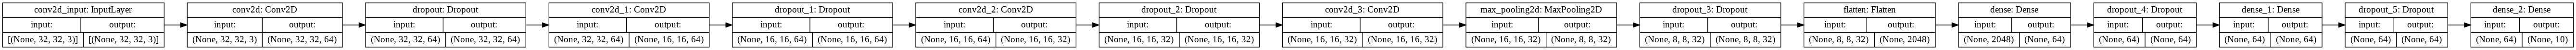

In [37]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
           rankdir='LR', expand_nested = True, dpi=96)

# New Section

In [ ]:
# Compile and train the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        3136      
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        16448     
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)       

In [ ]:
history = model.fit(
    train_images, train_labels, validation_data =
    (test_images, test_labels), epochs=EPOCHS, 
    batch_size=BATCH_SIZE, verbose=2, shuffle=True)

Epoch 1/128
1563/1563 - 208s - loss: 1.6691 - accuracy: 0.3858 - val_loss: 1.3408 - val_accuracy: 0.5060
Epoch 2/128
1563/1563 - 204s - loss: 1.3348 - accuracy: 0.5227 - val_loss: 1.1151 - val_accuracy: 0.6042
Epoch 3/128
1563/1563 - 206s - loss: 1.1807 - accuracy: 0.5804 - val_loss: 1.0086 - val_accuracy: 0.6549
Epoch 4/128
1563/1563 - 205s - loss: 1.0993 - accuracy: 0.6137 - val_loss: 1.0238 - val_accuracy: 0.6413
Epoch 5/128
1563/1563 - 206s - loss: 1.0455 - accuracy: 0.6341 - val_loss: 0.9313 - val_accuracy: 0.6813
Epoch 6/128
1563/1563 - 207s - loss: 1.0011 - accuracy: 0.6510 - val_loss: 0.8847 - val_accuracy: 0.6970
Epoch 7/128
1563/1563 - 207s - loss: 0.9684 - accuracy: 0.6644 - val_loss: 0.8868 - val_accuracy: 0.6988
Epoch 8/128
1563/1563 - 207s - loss: 0.9456 - accuracy: 0.6709 - val_loss: 0.8472 - val_accuracy: 0.7145
Epoch 9/128
1563/1563 - 206s - loss: 0.9184 - accuracy: 0.6795 - val_loss: 0.8224 - val_accuracy: 0.7197
Epoch 10/128
1563/1563 - 208s - loss: 0.8944 - accuracy